# Events Coursera Users

## Import Packages

In [176]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [177]:
df = pd.read_csv('../data/NMP/eventos/events_NMP.csv', index_col='id')
df_users = pd.read_csv('../data/NMP/cooked_data_coursera_users/users.csv', index_col='user_id')

## Data Cleaning and Preparation

In [178]:
# Deleting all the non coursera users
df = df[df.user_id.isin(df_users.index.values)]

In [179]:
# Deleting the unnecesary columns
df = df.drop(columns=['visit_id', 'course_id', 'time'])

In [180]:
# Deleting rows with NaN values, which are in the user_id columns
df = df.dropna()

### Interactions

In [181]:
# Getting interactions
df_interactions = df.groupby(['user_id']).agg({'user_id': 'count'})

# Renaming the columns
df_interactions = df_interactions.rename(columns={'user_id': 'interactions'})

### Types

In [182]:
# Getting Types
df_types = pd.crosstab(df.user_id, df.type, margins=True)

# Deleting Column All, since is already in df_interactions
df_types = df_types.drop(columns='All')

### Names

In [183]:
# Getting Names
df_names = pd.crosstab(df.user_id, df.name, margins=True)

# Deleting Column All, since is already in df_interactions
df_names = df_names.drop(columns='All')

In [184]:
# Spliting df_names in 3 Data Frames
buttons = []
graphs = []
menus = []

for col in df_names.columns:
    if 'Button' in col:
        buttons.append(col)
    elif 'Graph' in col:
        graphs.append(col)
    else:
        menus.append(col)
        
df_buttons = df_names[buttons]
df_graphs = df_names[graphs]
df_menus = df_names[menus]

## EDA: Exploratory Data Analysis

### Interactions

In [185]:
# Features/Variable names
df_interactions.columns

Index(['interactions'], dtype='object')

In [186]:
# Preview the data
df_interactions.head(5)

,interactions
user_id,
8.0,10
10.0,10
11.0,6
17.0,2
24.0,74


In [187]:
# General data statistics
df_interactions.describe()

,interactions
count,211.000000
mean,16.412322
std,24.451811
min,1.000000
25%,3.000000
50%,8.000000
75%,17.500000
max,188.000000


In [188]:
# Number of interactions
df_interactions.sum()

interactions    3463
dtype: int64

### Types

In [189]:
# Features/Variable names
df_types.columns

Index(['Button', 'Graph', 'Menu'], dtype='object', name='type')

In [190]:
# Preview the data
df_types.head(5)

type,Button,Graph,Menu
user_id,,,
8.0,1,0,9
10.0,0,5,5
11.0,1,0,5
17.0,0,0,2
24.0,8,30,36


In [191]:
# General data statistics
df_types.drop('All').describe()

type,Button,Graph,Menu
count,211.000000,211.000000,211.000000
mean,3.549763,6.222749,6.639810
std,7.820068,16.154688,7.353206
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,1.000000,0.000000,4.000000
75%,3.000000,3.000000,9.000000
max,71.000000,106.000000,45.000000


### Names: Buttons

In [192]:
# Features/Variable names
df_buttons.columns

Index(['Button_ComparisonDisabled', 'Button_ComparisonEnabled',
       'Button_DefineGoal', 'Button_DownloadAllNotes', 'Button_DownloadNote',
       'Button_EditNote', 'Button_Effectiveness',
       'Button_EngagementPerformance', 'Button_FilterTime30Days',
       'Button_FilterTime7Days', 'Button_FilterTimeViewAll',
       'Button_FilterViewAll', 'Button_NewNote', 'Button_SearchNote'],
      dtype='object', name='name')

In [193]:
# Preview the data
df_buttons.head(5)

name,Button_ComparisonDisabled,Button_ComparisonEnabled,Button_DefineGoal,Button_DownloadAllNotes,Button_DownloadNote,Button_EditNote,Button_Effectiveness,Button_EngagementPerformance,Button_FilterTime30Days,Button_FilterTime7Days,Button_FilterTimeViewAll,Button_FilterViewAll,Button_NewNote,Button_SearchNote
user_id,,,,,,,,,,,,,,
8.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24.0,0,0,0,3,0,0,3,0,0,0,0,2,0,0


In [194]:
# General data statistics
df_buttons.drop('All').describe()

name,Button_ComparisonDisabled,Button_ComparisonEnabled,Button_DefineGoal,Button_DownloadAllNotes,Button_DownloadNote,Button_EditNote,Button_Effectiveness,Button_EngagementPerformance,Button_FilterTime30Days,Button_FilterTime7Days,Button_FilterTimeViewAll,Button_FilterViewAll,Button_NewNote,Button_SearchNote
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.099526,0.308057,0.265403,0.312796,0.018957,0.369668,0.478673,0.156398,0.170616,0.284360,0.232227,0.246445,0.502370,0.104265
std,0.430448,1.048755,0.733996,0.843336,0.136699,1.975042,1.135266,0.506335,0.755481,1.289035,0.898732,1.409466,2.161072,0.638846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,10.000000,6.000000,7.000000,1.000000,25.000000,11.000000,4.000000,9.000000,17.000000,8.000000,19.000000,26.000000,7.000000


### Names: Graphs

In [195]:
# Features/Variable names
df_graphs.columns

Index(['Graph_EffectivenessActivityType', 'Graph_EffectivenessByDayWeek',
       'Graph_EngagementByNumberActivities',
       'Graph_EngagementByTypeActivities', 'Graph_TimeInSessions',
       'Graph_TimeUse', 'Graph_TimeUseOnCourse'],
      dtype='object', name='name')

In [196]:
# Preview the data
df_graphs.head(5)

name,Graph_EffectivenessActivityType,Graph_EffectivenessByDayWeek,Graph_EngagementByNumberActivities,Graph_EngagementByTypeActivities,Graph_TimeInSessions,Graph_TimeUse,Graph_TimeUseOnCourse
user_id,,,,,,,
8.0,0,0,0,0,0,0,0
10.0,0,0,0,0,0,0,5
11.0,0,0,0,0,0,0,0
17.0,0,0,0,0,0,0,0
24.0,0,0,0,28,0,0,2


In [197]:
# General data statistics
df_graphs.drop('All').describe()

name,Graph_EffectivenessActivityType,Graph_EffectivenessByDayWeek,Graph_EngagementByNumberActivities,Graph_EngagementByTypeActivities,Graph_TimeInSessions,Graph_TimeUse,Graph_TimeUseOnCourse
count,211.000000,211.000000,211.000000,211.00000,211.000000,211.000000,211.000000
mean,0.161137,0.018957,0.056872,4.78673,0.009479,0.009479,1.180095
std,1.654030,0.217389,0.557706,13.91392,0.137686,0.137686,3.409480
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.000000
max,18.000000,3.000000,7.000000,103.00000,2.000000,2.000000,23.000000


### Names: Menu

In [198]:
# Features/Variable names
df_menus.columns

Index(['Menu_ChooseCourse', 'Menu_GoalSetting', 'Menu_ViewNotes'], dtype='object', name='name')

In [199]:
# Preview the data
df_menus.head(5)

name,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
user_id,,,
8.0,5,2,2
10.0,3,1,1
11.0,2,0,3
17.0,0,1,1
24.0,23,5,8


In [200]:
# General data statistics
df_menus.drop('All').describe()

name,Menu_ChooseCourse,Menu_GoalSetting,Menu_ViewNotes
count,211.000000,211.000000,211.000000
mean,3.161137,1.497630,1.981043
std,4.651943,1.487646,2.368367
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,2.000000,1.000000,1.000000
75%,4.000000,2.000000,2.500000
max,36.000000,8.000000,14.000000


## Data Analysis and Visualizations

### Users with Interactions

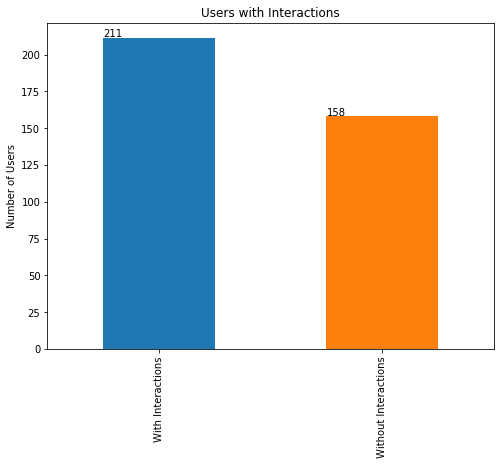

In [201]:
ax = pd.Series({ 'With Interactions': len(df_interactions), 'Without Interactions': len(df_users) - len(df_interactions)}).plot(kind='bar', figsize=(8,6), title="Users with Interactions")
ax.set_ylabel("Number of Users")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions Frequencies

[]

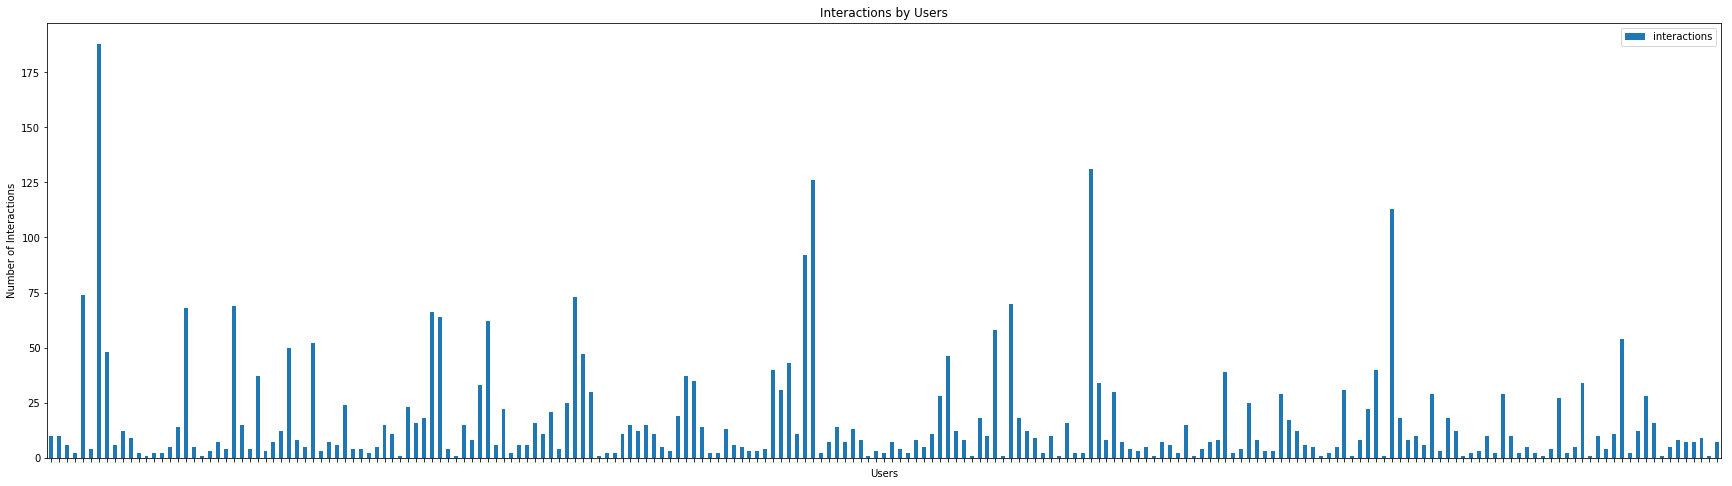

In [202]:
ax = df_interactions.plot(kind='bar', figsize=(30,8), title="Interactions by Users")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Users")

ax.set_xticklabels([])

### Interactions by Type

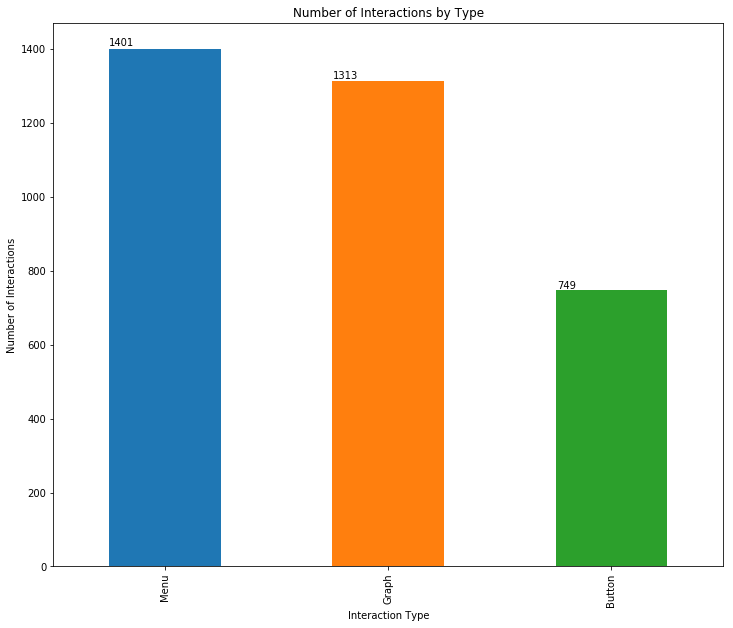

In [203]:
ax = df_types.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title="Number of Interactions by Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Interaction Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Menu Interactions Frequencies

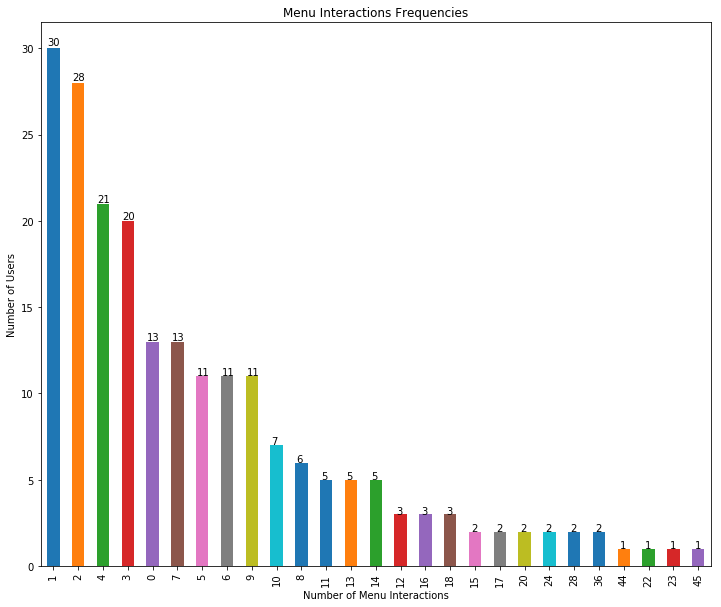

In [204]:
ax = df_types.drop('All').Menu.value_counts().plot(kind='bar', figsize=(12,10), title="Menu Interactions Frequencies")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Menu Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Graph Interactions Frequencies

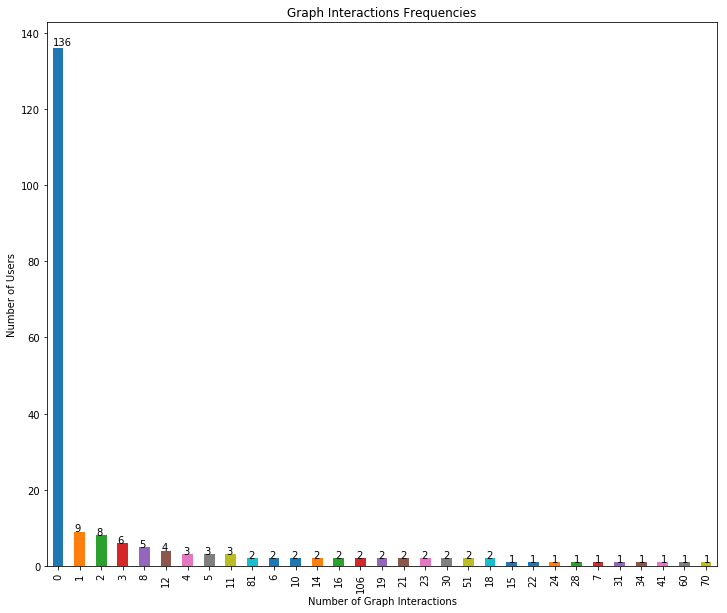

In [205]:
ax = df_types.drop('All').Graph.value_counts().plot(kind='bar', figsize=(12,10), title="Graph Interactions Frequencies")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Graph Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

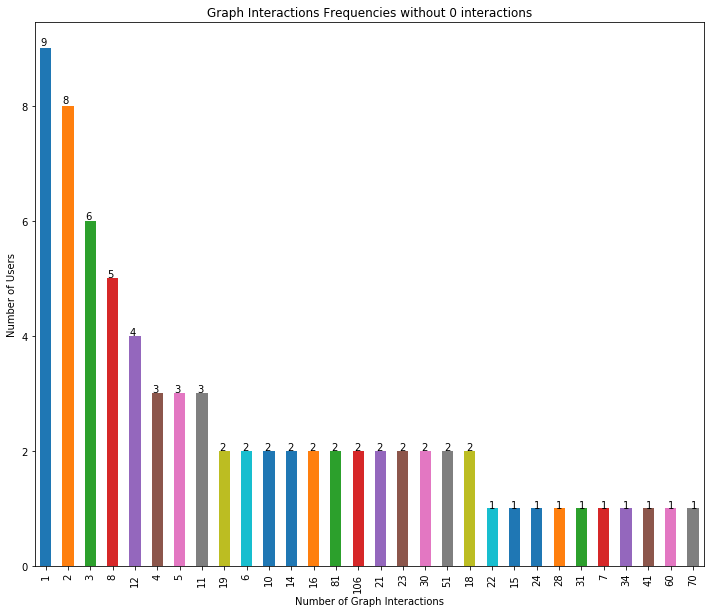

In [206]:
ax = df_types[df_types.Graph > 0].drop('All').Graph.value_counts().plot(kind='bar', figsize=(12,10), title="Graph Interactions Frequencies without 0 interactions")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Graph Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Button Interactions Frequencies

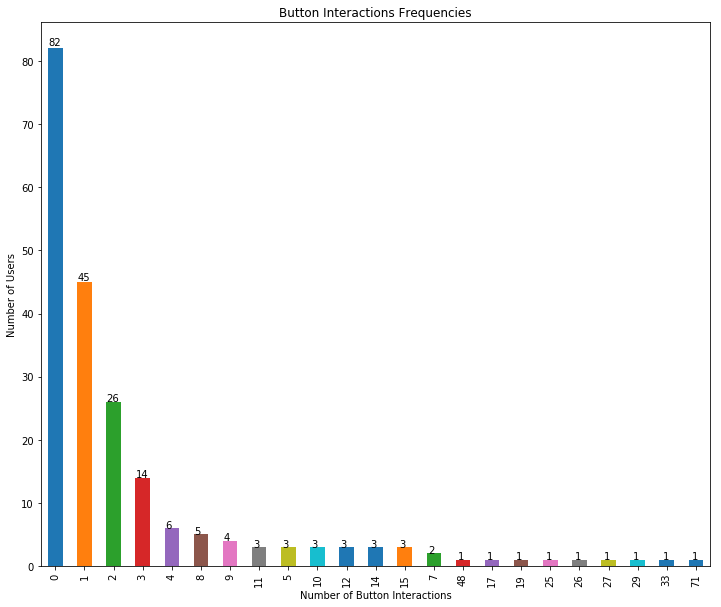

In [207]:
ax = df_types.drop('All').Button.value_counts().plot(kind='bar', figsize=(12,10), title="Button Interactions Frequencies")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Number of Button Interactions")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

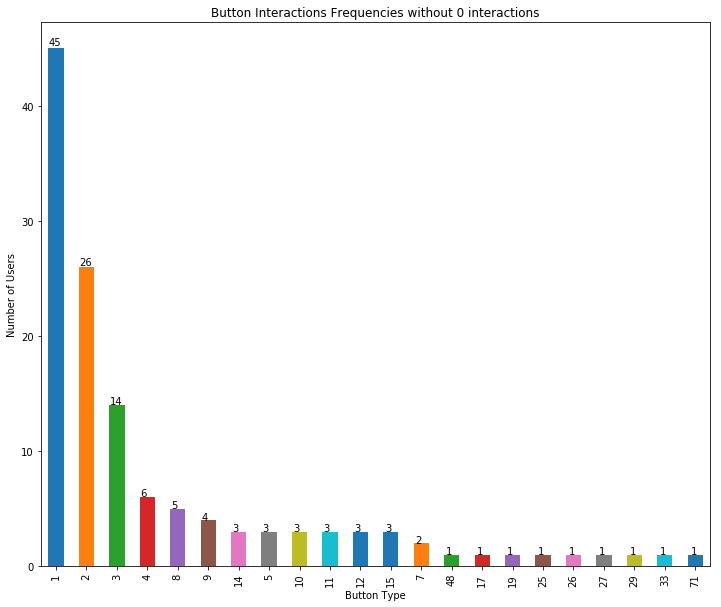

In [208]:
ax = df_types[df_types.Button > 0].drop('All').Button.value_counts().plot(kind='bar', figsize=(12,10), title="Button Interactions Frequencies without 0 interactions")
ax.set_ylabel("Number of Users")
ax.set_xlabel("Button Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Button Type

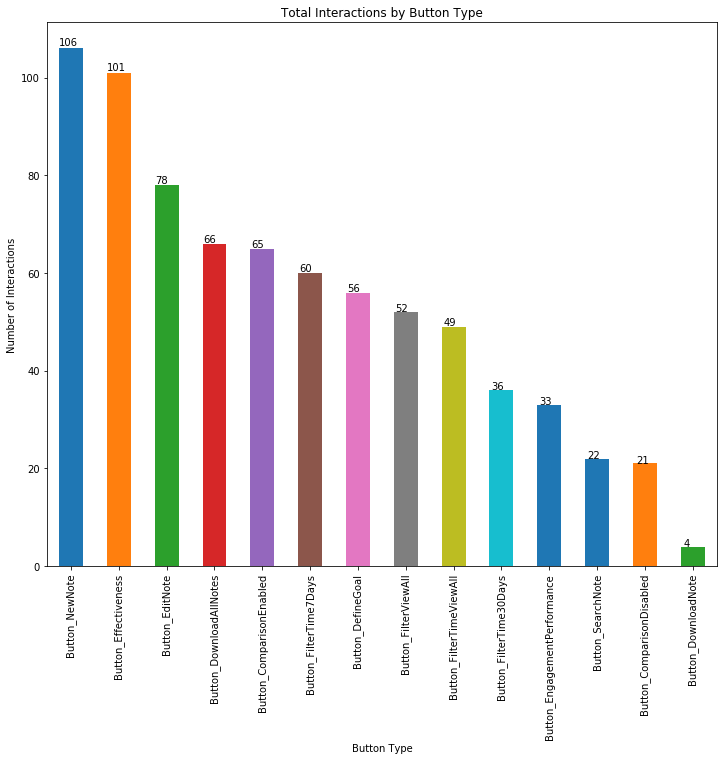

In [209]:
ax = df_buttons.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title="Total Interactions by Button Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Button Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

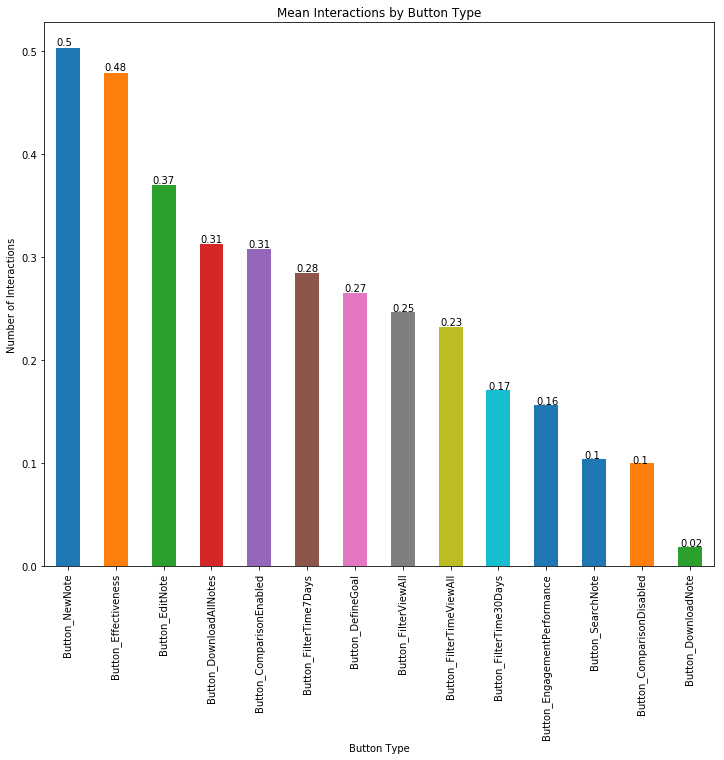

In [210]:
ax = df_buttons.drop('All').mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title="Mean Interactions by Button Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Button Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Graph Type

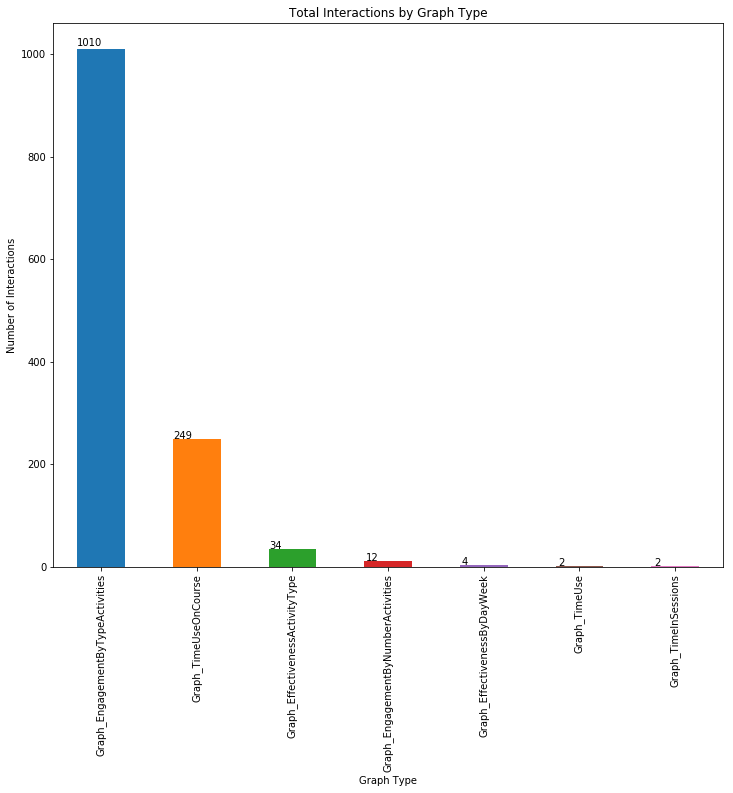

In [211]:
ax = df_graphs.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title="Total Interactions by Graph Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Graph Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

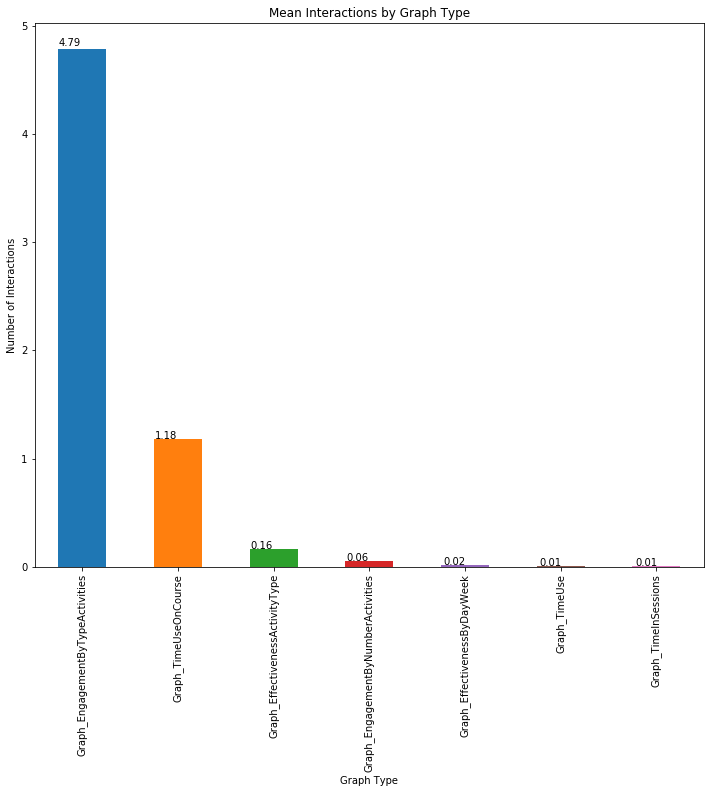

In [216]:
ax = df_graphs.drop('All').mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title="Mean Interactions by Graph Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Graph Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

### Interactions by Menu Type

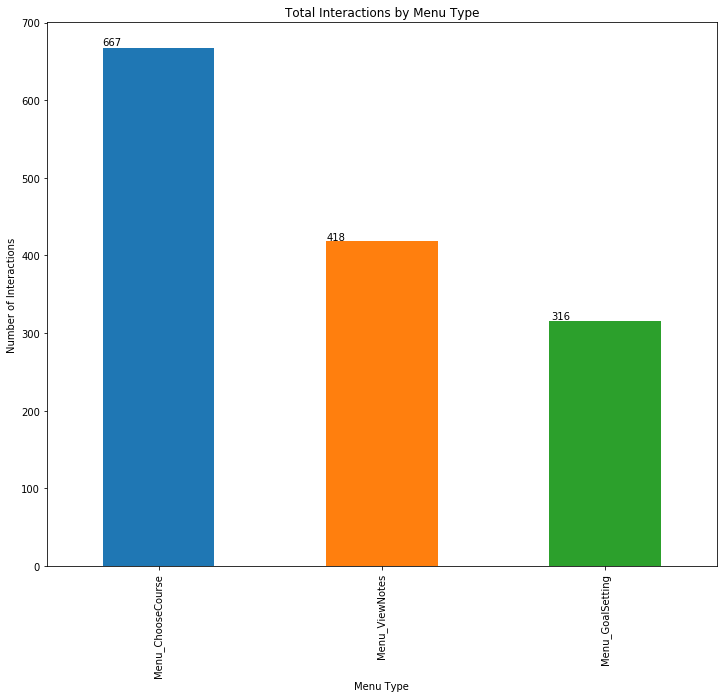

In [213]:
ax = df_menus.loc['All'].sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title="Total Interactions by Menu Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Menu Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

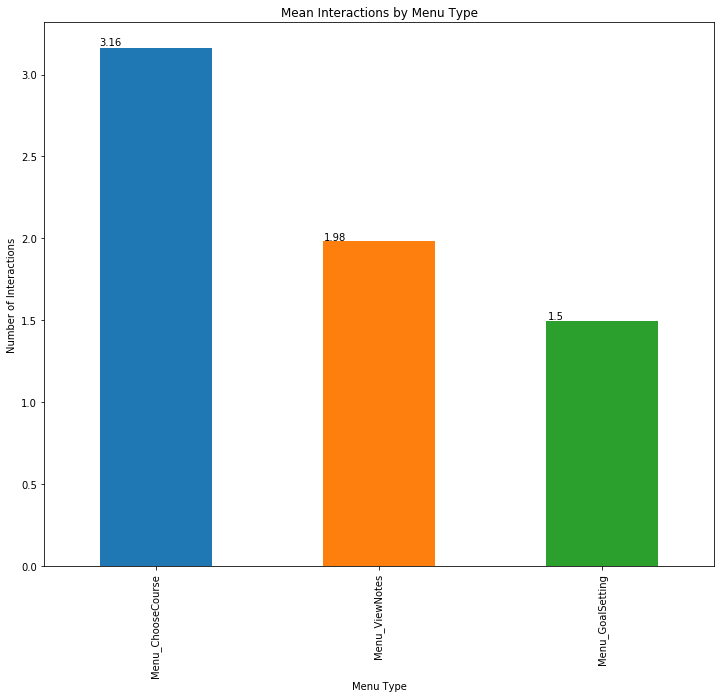

In [217]:
ax = df_menus.drop('All').mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,10), title="Mean Interactions by Menu Type")
ax.set_ylabel("Number of Interactions")
ax.set_xlabel("Menu Type")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

## Export Data

In [215]:
df.to_csv('../data/NMP/cooked_data_coursera_users/events.csv', index_label='id')
df_interactions.to_csv('../data/NMP/cooked_data_coursera_users/interactions.csv', index_label='user_id')
df_names.to_csv('../data/NMP/cooked_data_coursera_users/interactions_names.csv', index_label='user_id')
df_types.to_csv('../data/NMP/cooked_data_coursera_users/interactions_types.csv', index_label='user_id')
df_buttons.drop('All').to_csv('../data/NMP/cooked_data_coursera_users/buttons_by_users.csv', index_label='user_id')
df_graphs.drop('All').to_csv('../data/NMP/cooked_data_coursera_users/graphs_by_users.csv', index_label='user_id')
df_menus.drop('All').to_csv('../data/NMP/cooked_data_coursera_users/menus_by_users.csv', index_label='user_id')